# **E-commerce Shopping EDA**

## Shopping Dataset Description

- **Administrative:** This is the number of pages of this type (administrative) that the user visited. *Eg:* account, addresses, cart, orders etc

- **Administrative_Duration:** This is the amount of time spent in this category of pages.

- **Informational:** This is the number of pages of this type (informational) that the user visited.

- **Informational_Duration:** This is the amount of time spent in this category of pages.

- **ProductRelated:** This is the number of pages of this type (product related) that the user visited.

- **ProductRelated_Duration:** This is the amount of time spent in this category of pages.

- **BounceRates:** The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

- **ExitRates:** The percentage of pageviews on the website that end at that specific page.

- **PageValues:** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

- **SpecialDay:** This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

- **Month:** Contains the month the pageview occurred, in string form.

- **OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.

- **Browser:** An integer value representing the browser that the user was using to view the page.

- **Region:** An integer value representing which region the user is located in.

- **TrafficType:** An integer value representing what type of traffic the user is categorized into.

- **VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

- **Weekend:** A boolean representing whether the session is on a weekend.

- **Revenue:** A boolean representing whether or not the user completed the purchase.

## Importing Libraries and Loading Datasets

In [1]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
!gdown 1_TtD7ufSrwyYtfOERQUyVXkUQSa9K4Uj

df = pd.read_csv('/content/shopping.csv')

Downloading...
From: https://drive.google.com/uc?id=1_TtD7ufSrwyYtfOERQUyVXkUQSa9K4Uj
To: /content/shopping.csv
100% 1.07M/1.07M [00:00<00:00, 29.7MB/s]


## Basic Metrics

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# shape
df.shape

(12330, 18)

In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Checking Nulls
df.isna().sum().sum()

0

In [ ]:
#Checking Duplicates
df.duplicated().sum()

125

## Processing Dataset

### Removing duplicates

In [2]:
df = df.drop_duplicates(keep='first')

In [3]:
df.duplicated().sum()

0

### Adding new feature 'Visited_All_Categories'

In [4]:
df['Visited_All_Categories'] = (df['Administrative'] > 0) & (df['Informational'] > 0) & (df['ProductRelated'] > 0)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Visited_All_Categories
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

## Descriptive Statistics

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


- Visitors spend most of their time on ProductRelated pages with an average duration of 1195, whereas 81 for Administrative pages and 34 for Informational pages
- Vistors visits more ProductRelated pages with an average of 32 pages, whereas 2 for Administrative pages and 0.5 for Informational pages.
- Average Pagevalue is 18.


## Univarient Analysis

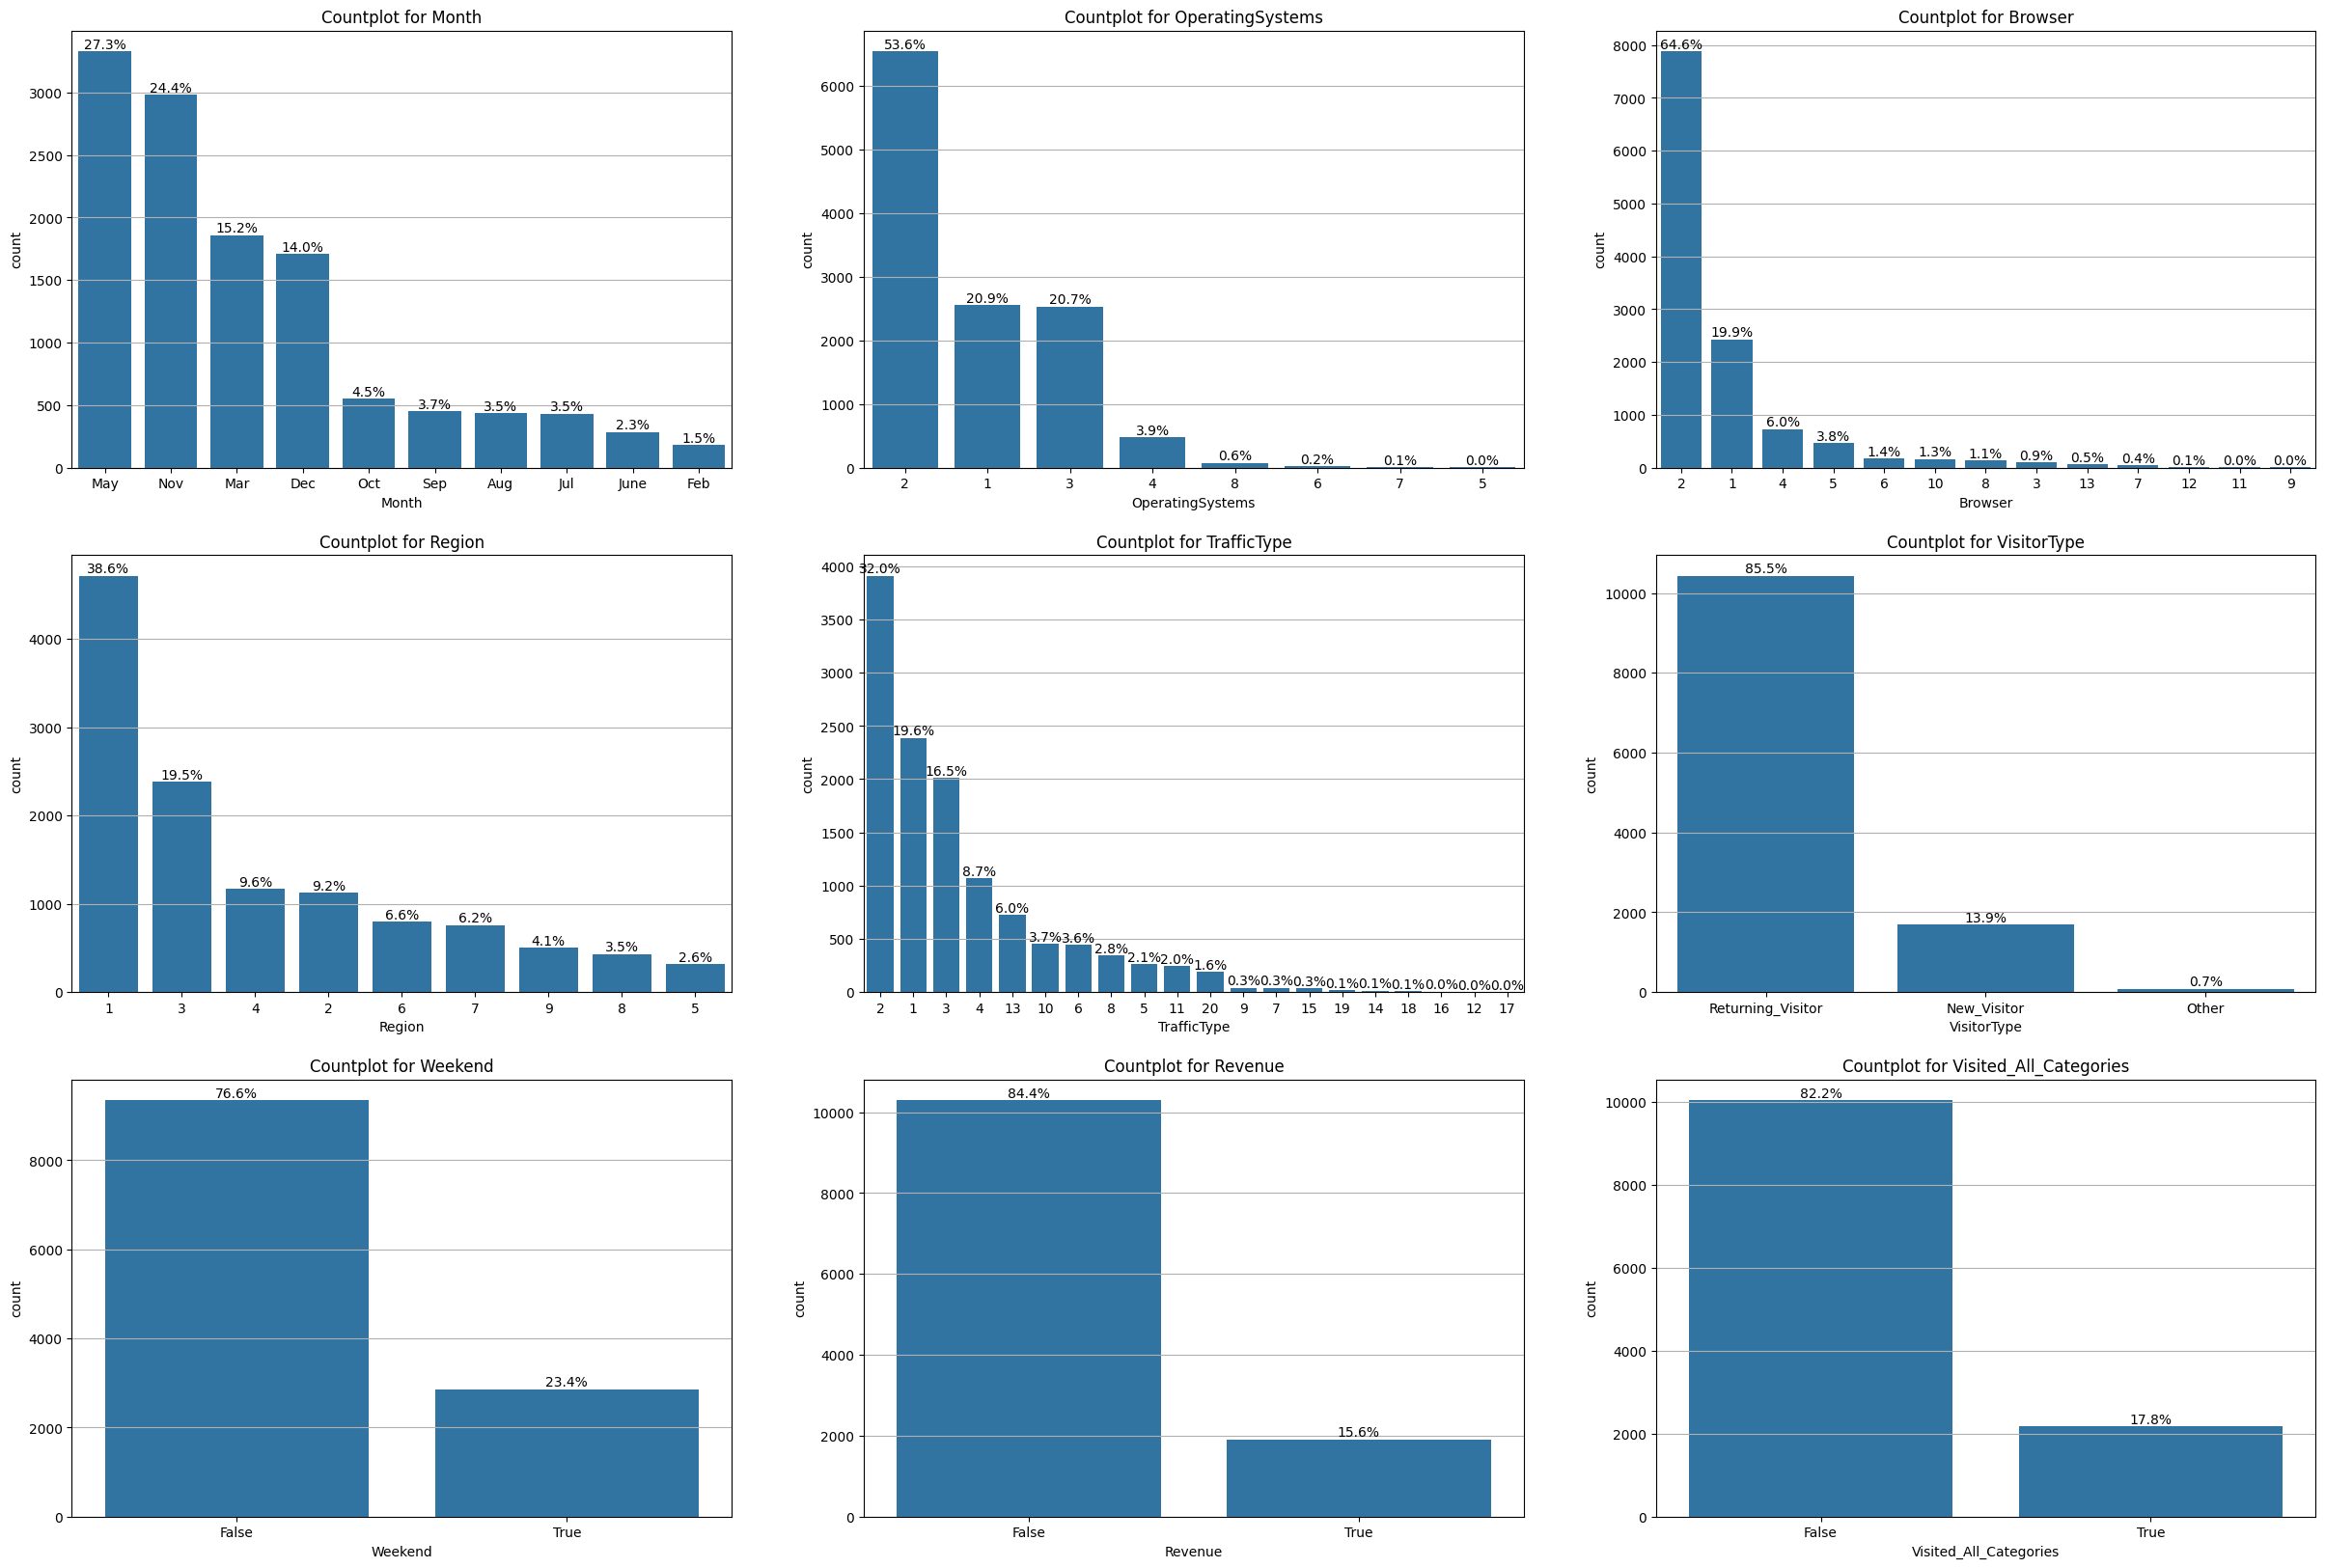

In [ ]:
plt.figure(figsize=(30,20))

cat_cols=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue','Visited_All_Categories']
for i in cat_cols:
  plt.subplot(3,3,cat_cols.index(i)+1)
  plt.title('Countplot for '+i)
  plt.grid(True)
  g = sns.countplot(df, x=i, order=df[i].value_counts().index)
  for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=str(round(((j.get_height()/12205)*100),1)) + '%', ha='center', va='bottom')

plt.show()

- Almost 27% of the visits come in May which is the highest, followed by November with 24%
- Almost 54% of the visitors uses Operating System 2, 21% uses Operating System 1 and 21% uses Operating System 3
- 65% of the visit happened through browser 2, followed by 20% through browser 1
- 39% of the visitors belongs to Region 1, followed by Region 3 with 20%
- 32% of the visitors belongs to TrafficType 2, followed by TrafficType 1 with 20%.
- 86% of the visits made by the Retained visitor and rest by new visitors
- 23% of the visits are happening on weekends.
- Purchases are happening on 16% of the visits.
- Only 18% of the visitors visited all three page categories.

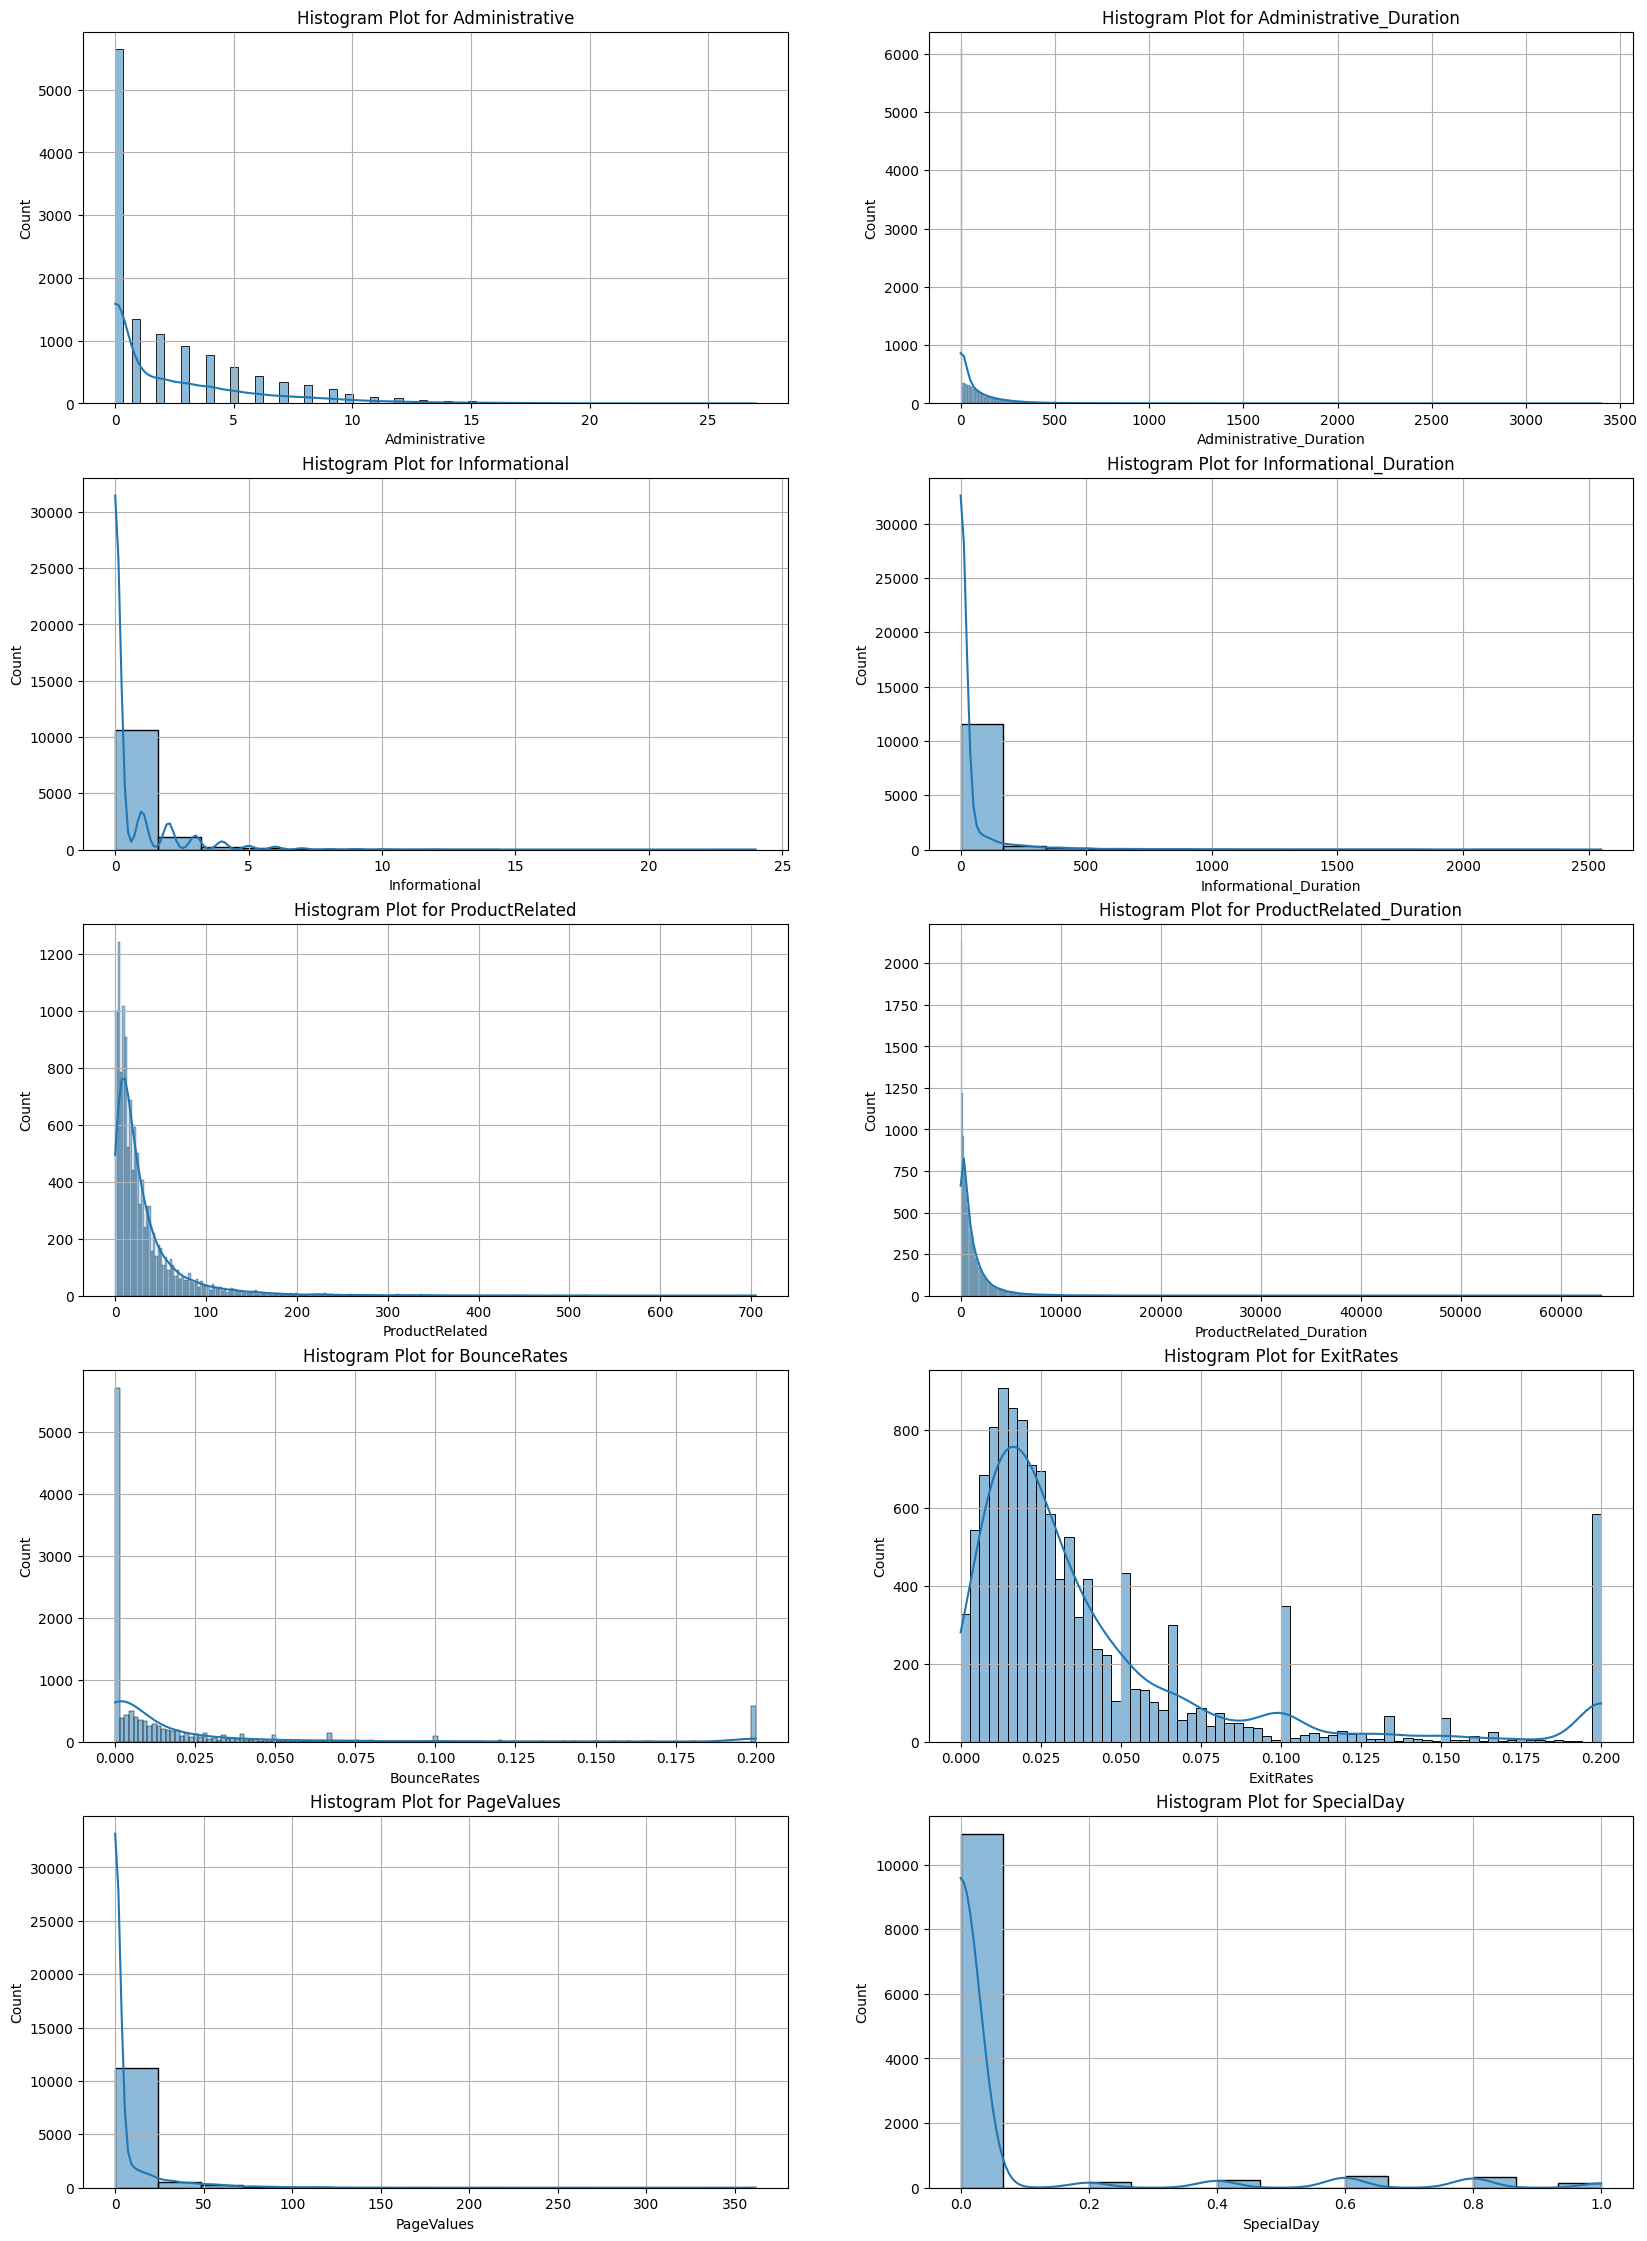

In [6]:
plt.figure(figsize=(20,28))

num_cols=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

for i in num_cols:
  plt.subplot(5,2,num_cols.index(i)+1)
  plt.title('Histogram Plot for '+i)
  plt.grid(True)
  sns.histplot(data=df[i], kde=True)

plt.show()

- Visitors spend most of their time on ProductRelated , less time on Administrative pages and Informational pages
- Vistors visits more ProductRelated pages than Administrative pages and Informational pages.
- SpecialDay has high distribution near 0.0 i.e, Visits are high on or near Special Days.

## Bivarient Analysis

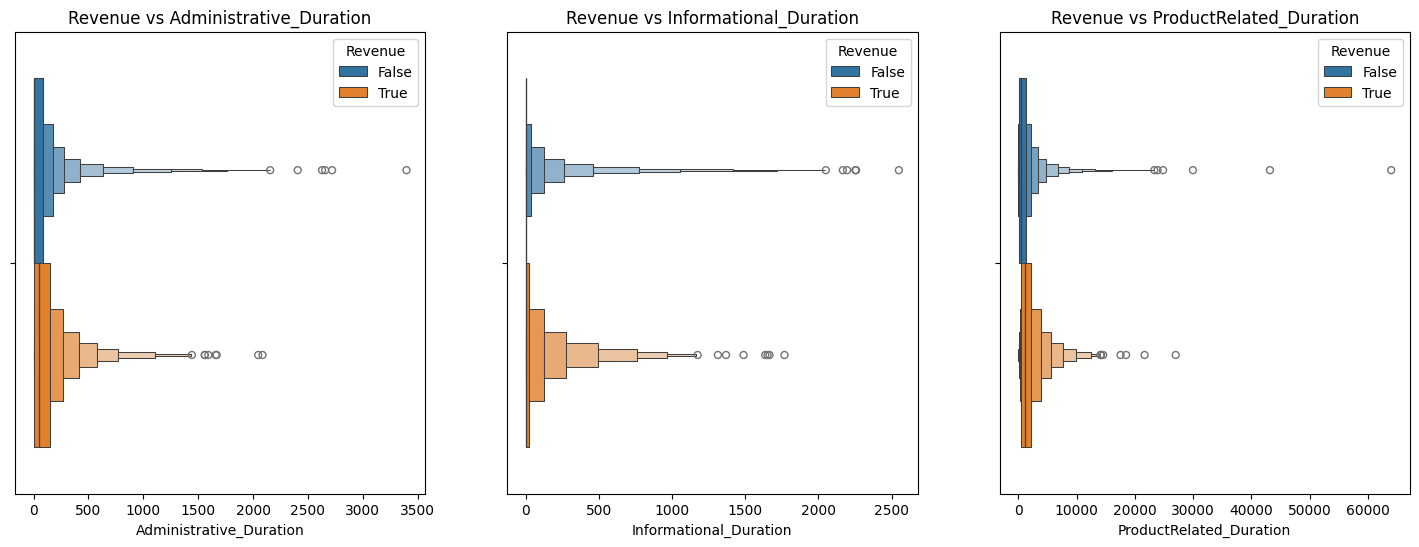

In [ ]:
plt.figure(figsize=(18,6))

cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

for i in cols:
  plt.subplot(1,3,cols.index(i)+1)
  plt.title('Revenue vs '+i)
  sns.boxenplot(df, x=i, hue='Revenue')

plt.show()



- Visitors spend comparitively more time while purchasing and also has low outliers while purchasing.

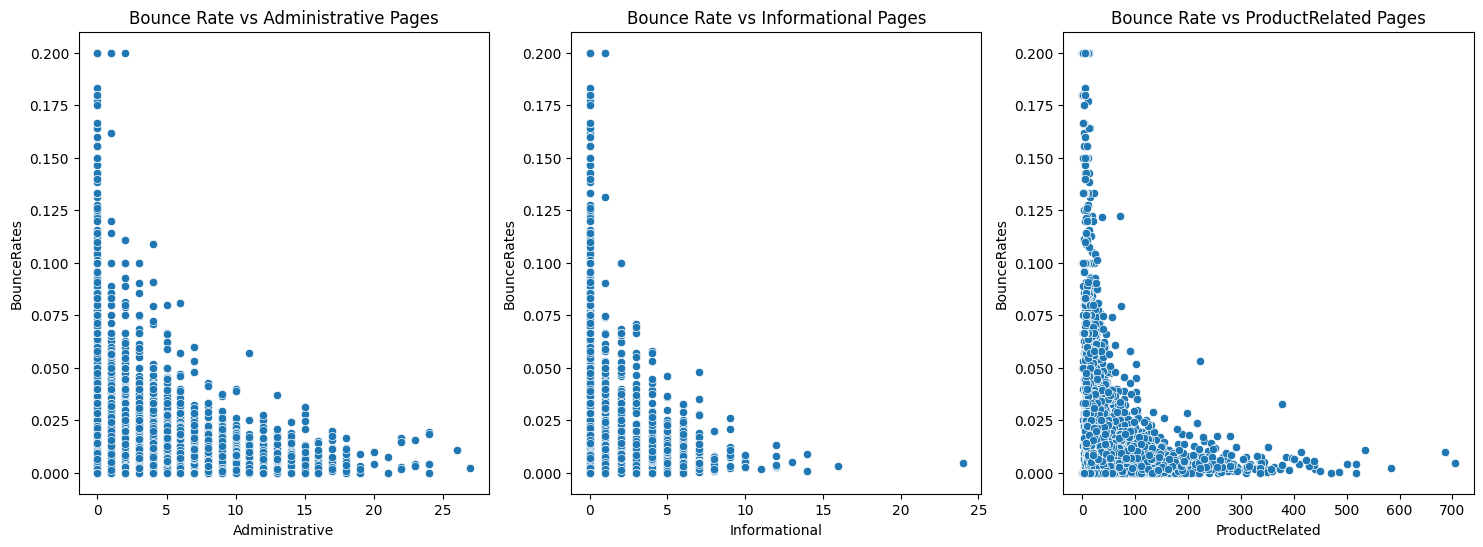

In [ ]:
plt.figure(figsize=(18,6))

cols = ['Administrative', 'Informational', 'ProductRelated']

for i in cols:
  plt.subplot(1,3,cols.index(i)+1)
  plt.title('Bounce Rate vs '+ i + ' Pages')
  sns.scatterplot(df, x=i, y='BounceRates')

plt.show()

- Bounce rate is high at small number of pages

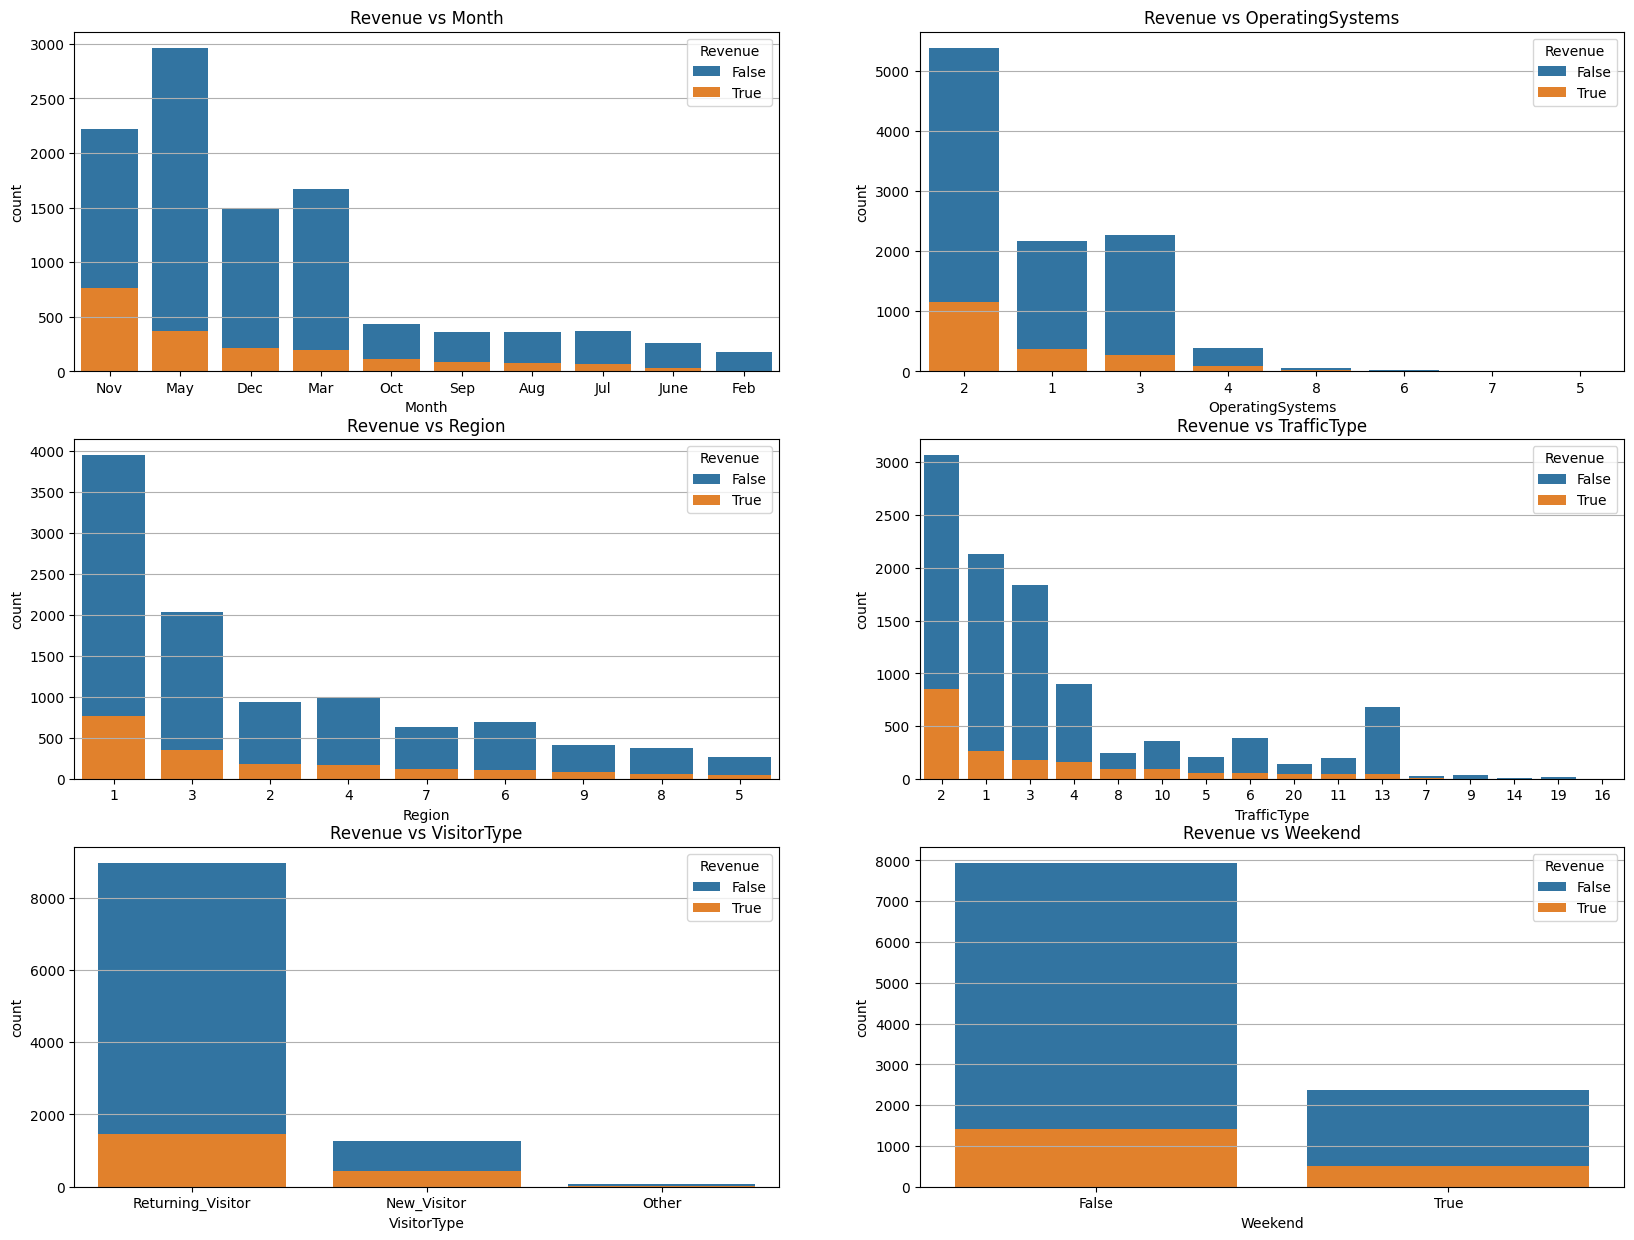

In [ ]:
plt.figure(figsize=(20,15))

cols = ['Month', 'OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

for i in cols:
  plt.subplot(3,2,cols.index(i)+1)
  plt.title('Revenue vs '+ i)
  plt.grid(True)
  sns.countplot(df, x=i, hue='Revenue', order=df[df['Revenue']==True][i].value_counts().index, dodge=False)

plt.show()

- Most purchases happened in November followed by May.
- Most purchases happened by visitors belonging to region 1 followed by region 3.
- Most purchases happened by visitors using OperatingSystem 2 followed by OperatingSystem 1.
- Most purchases happened by visitors having TrafficType 2 followed by TrafficType 1.
- Most purchases happened by returning visitors and in weekdays.

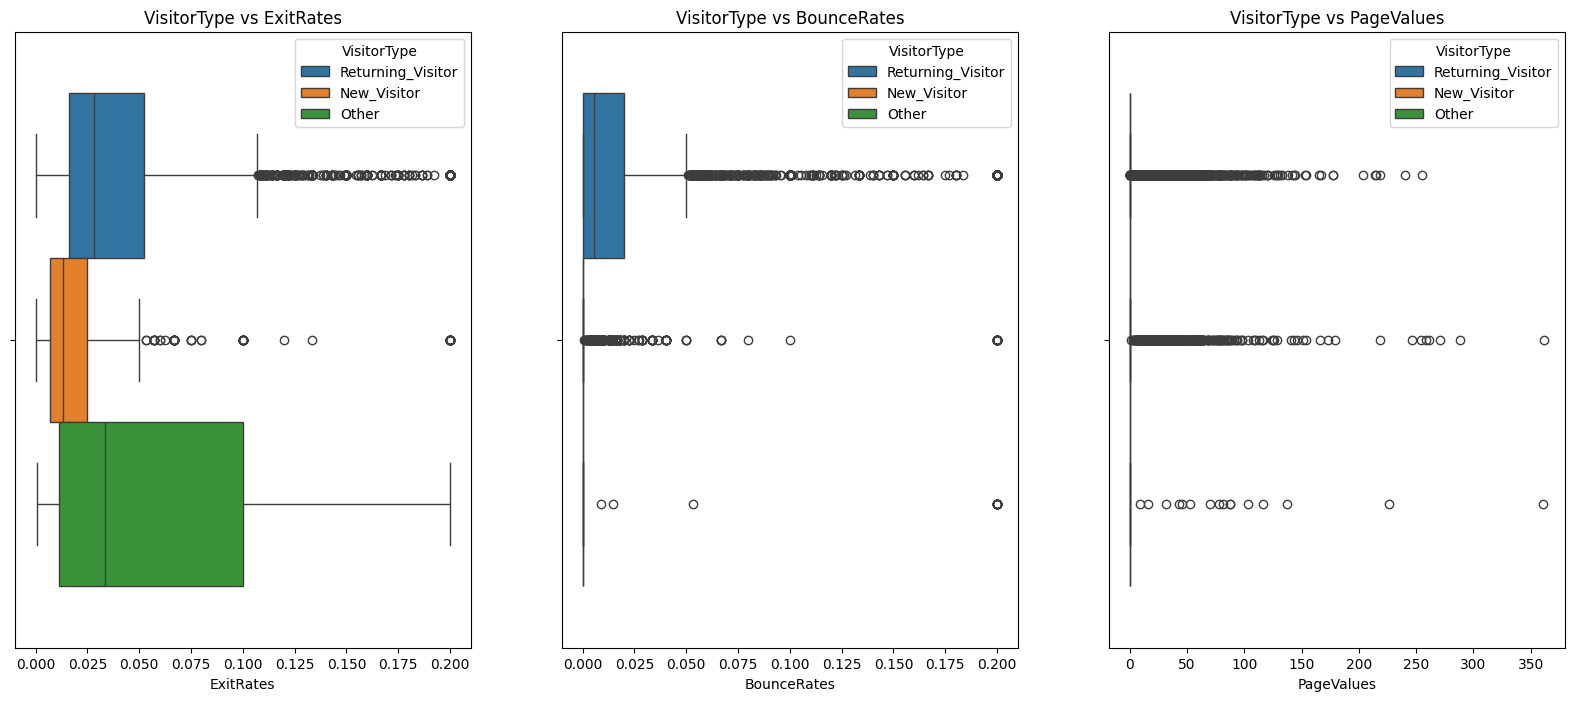

In [ ]:
plt.figure(figsize=(20,8))

cols = ['ExitRates', 'BounceRates', 'PageValues']

for i in cols:
  plt.subplot(1,3,cols.index(i)+1)
  plt.title('VisitorType vs '+i)
  sns.boxplot(df, x=i, hue='VisitorType')

plt.show()

- There are so many outliers for Page Values
- Returning visitors has high Exit and Bounce rates.

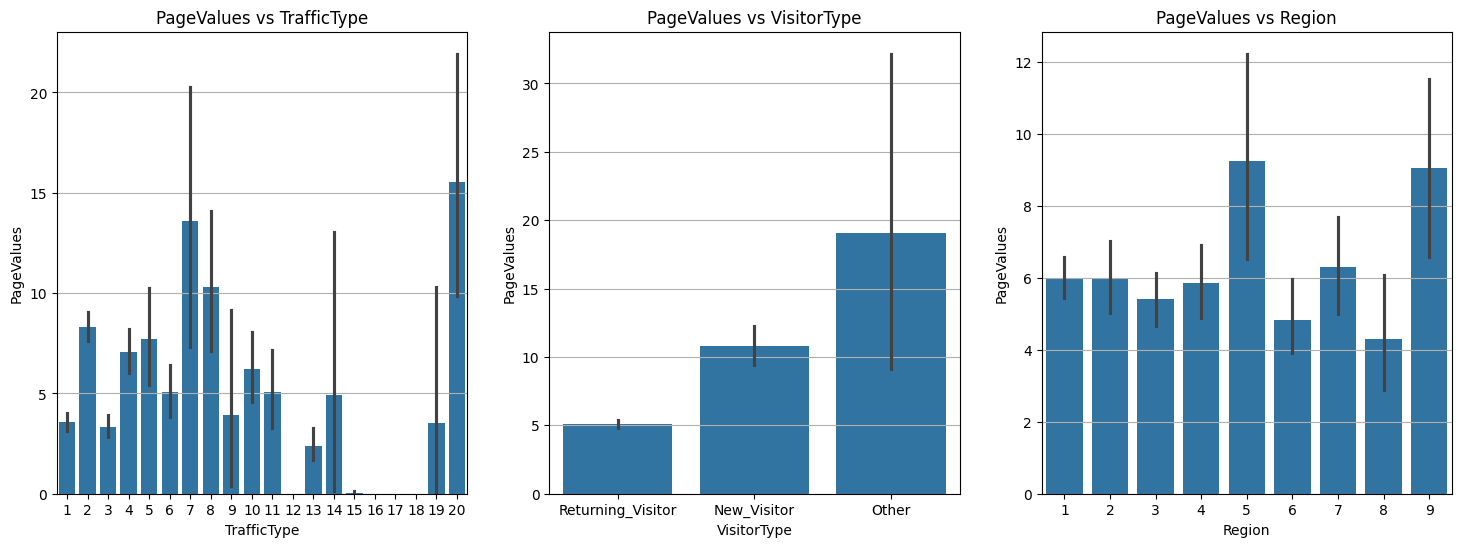

In [ ]:
plt.figure(figsize=(18,6))

cols = ['TrafficType', 'VisitorType','Region']

for i in cols:
  plt.subplot(1,3,cols.index(i)+1)
  plt.title('PageValues vs '+i)
  plt.grid(True)
  sns.barplot(df, x=i, y='PageValues')

plt.show()

- Regions 5 and 9 has higher average PageValues of 9.
- TrafficType 20 has higher average PageValue of 16.

## Correlation Analysis

In [ ]:
df_corr = df.corr(numeric_only=True)
df_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Visited_All_Categories
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330,0.464300
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768,0.320837
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626,0.709444
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358,0.443470
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042,0.346242
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077,0.333795
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091,-0.134439
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320,-0.196937
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894,0.065784
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601,-0.057376


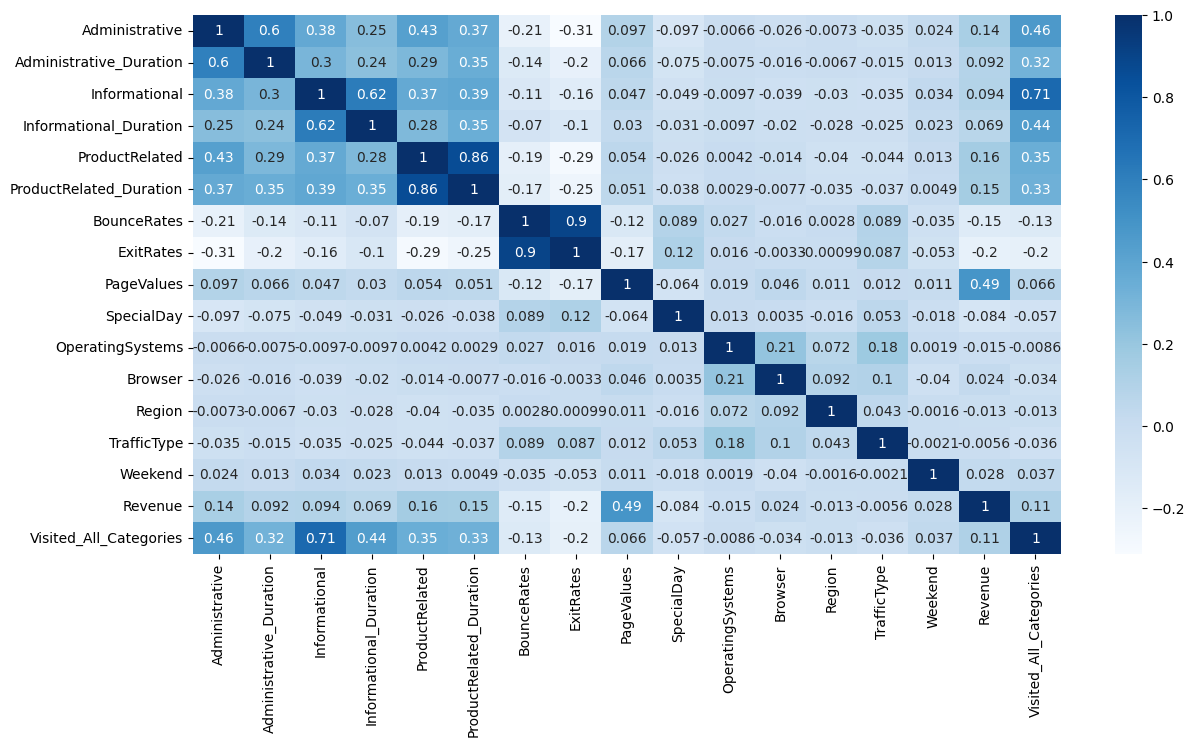

In [ ]:
# Heat Map
plt.figure(figsize=(14,7))
sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.show()

- Revenue has some weak correlation with PageValues.
- Revenue has weak correlation with SpecialDay i.e., Revenue is more on or near SpecialDay.
- Page types has strong correlation with their respective duration.
- Visited_All_Categories has correlation with Informational i.e, there is a chance of people visiting informational page category visits all the three categories

# Insights

- Visitors spend most time on ProductRelated pages (avg. 1195), followed by Administrative (81) and Informational (34), with more visits to ProductRelated pages (avg. 32) than Administrative (2) and Informational (0.5).

- The average PageValue is 18, with many outliers. Regions 5 and 9 have higher PageValues (9), and TrafficType 20 has the highest (16).

- May (27%) and November (24%) see the highest visits, with most purchases in November. Visitors spend more time and have fewer outliers when purchasing.

- 54% of visitors use OS 2, 65% use Browser 2, and 39% are from Region 1. Region 1 leads in purchases, followed by Region 3.

- TrafficType 2 accounts for 32% of visits and leads in purchases.

- 86% of visitors are returning, and they make most purchases on weekdays. They also have high exit and bounce rates.

- 23% of visits happen on weekends, and 16% of visits lead to purchases.

- SpecialDay correlates weakly with revenue, but visits increase near special days.

- Page types strongly correlate with their respective durations, and bounce rates are higher for fewer pages.

- 18% of visitors visit all categories, with a correlation between Informational pages and visiting all categories.

# Recommendations

- **Focus on Product Pages**: Since visitors spend the most time and visit more ProductRelated pages, optimize these pages for conversions. Improve product details, visuals, and user experience to maximize engagement.

- **Enhance Administrative and Informational Pages**: Visitors spend less time on Administrative and Informational pages. Streamline these pages to make navigation faster and ensure critical information (e.g., checkout, account details) is easy to access.

- **Boost Marketing Around Special Days**: With increased visits near special days, consider running targeted promotions or holiday-specific campaigns to capitalize on higher transaction likelihood.

- **Improve PageValue for Other Regions and Traffic Types**: Regions 5, 9, and TrafficType 20 show higher PageValues. Investigate why these outperform others and replicate successful strategies across other regions and traffic types.

- **Focus on Returning Visitors**: Since returning visitors account for most purchases, implement loyalty programs, retargeting, and personalized recommendations to encourage repeat purchases and increase retention.

- **Optimize for Weekday Visits**: As most purchases happen on weekdays, schedule key promotions, product launches, and email campaigns during these days for better conversion rates.

- **Target OS and Browser Preferences**: Since the majority of visitors use OS 2 and Browser 2, ensure that your website is fully optimized for these platforms to provide a seamless experience.

- **Monitor Bounce Rates and Exit Rates**: High bounce rates on fewer pages suggest a need for improving first impressions, especially on landing pages. Test different layouts, content, and calls-to-action to reduce bounce rates.

- **Encourage Cross-Category Engagement**: Only 18% of visitors access all page categories, but there's a correlation between Informational pages and cross-category engagement. Promote content that encourages visitors to explore multiple page types.

- **Leverage May and November Traffic**: With May and November seeing peak visits and purchases, plan major sales, discounts, or special offers during these months to maximize revenue.
